In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Step 3: Set Up and Run the Kalman Filter for Prediction

Here's the Kalman Filter setup tailored to track and predict displacement change in Google Colab.

In [ ]:
import pandas as pd

# Load the CSV files for before and after landslides
df_before = pd.read_csv('/content/drive/MyDrive/Landslide/Before.csv')
df_after = pd.read_csv('/content/drive/MyDrive/Landslide/after.csv')

# Print the first few rows to check the data
print("Before landslide data:")
print(df_before.head())

print("After landslide data:")
print(df_after.head())

# Merge the two dataframes based on the X, Y coordinates (rounding if necessary)
merged_df = pd.merge(df_before, df_after, on=['X', 'Y'], suffixes=('_before', '_after'))

# Print the merged dataframe to verify the data is merging correctly
print("Merged Data:")
print(merged_df.head())

# If the merge is successful, calculate the displacement change
if not merged_df.empty:
    merged_df['displacement_change'] = merged_df['Z_after'] - merged_df['Z_before']
    print("Displacement Change:")
    print(merged_df[['X', 'Y', 'displacement_change']])
else:
    print("No matching rows found after merging. Please check for small discrepancies in the X and Y values.")


Before landslide data:
   FID           Z        Y          X
0    0 -393.915008  6.57727  36.728102
1    1 -501.903992  6.57727  36.728234
2    2 -481.282989  6.57727  36.728366
3    3 -490.964996  6.57727  36.728498
4    4 -518.476990  6.57727  36.728630
After landslide data:
   FID           Z        Y          X
0    1 -697.296021  6.57727  36.728102
1    2 -502.027008  6.57727  36.728234
2    3  132.171005  6.57727  36.728366
3    4  396.532013  6.57727  36.728498
4    5  149.852997  6.57727  36.728630
Merged Data:
   FID_before    Z_before        Y          X  FID_after     Z_after
0           0 -393.915008  6.57727  36.728102          1 -697.296021
1           1 -501.903992  6.57727  36.728234          2 -502.027008
2           2 -481.282989  6.57727  36.728366          3  132.171005
3           3 -490.964996  6.57727  36.728498          4  396.532013
4           4 -518.476990  6.57727  36.728630          5  149.852997
Displacement Change:
                 X         Y  displacem

In [ ]:
# Save the dataframe with displacement changes to a new CSV file
output_file = '/content/drive/MyDrive/Landslide/Outpu/displacement_changes.csv'
merged_df[['X', 'Y', 'displacement_change']].to_csv(output_file, index=False)

print(f"Displacement change data saved to: {output_file}")


Displacement change data saved to: /content/drive/MyDrive/Landslide/Outpu/displacement_changes.csv


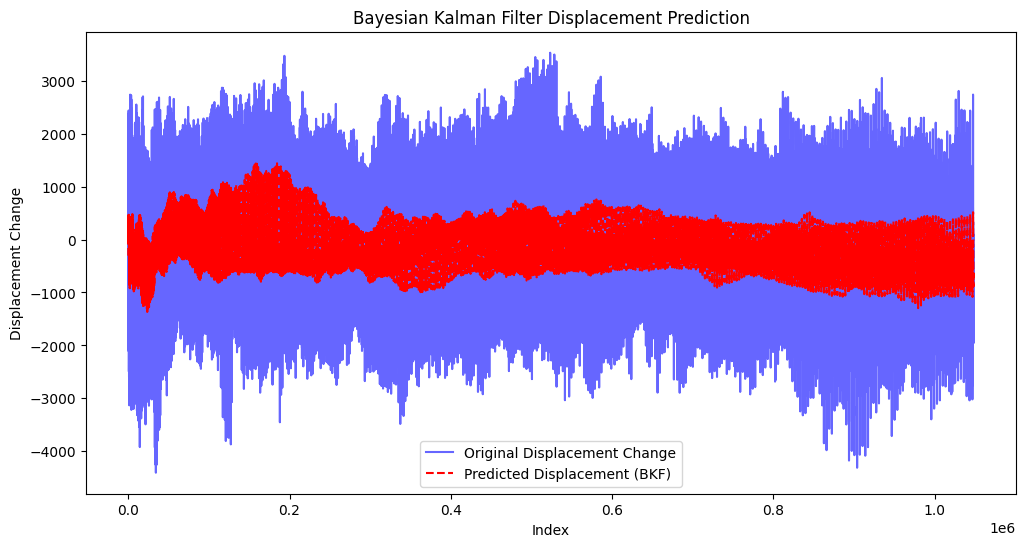

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize Bayesian Kalman Filter parameters
Q = 1e-5  # Process noise covariance (model uncertainty)
R = 0.1   # Measurement noise covariance (measurement uncertainty)
P = 1.0   # Initial estimation error covariance (uncertainty of the first estimate)
x_prev = merged_df['displacement_change'].iloc[0]  # Initial estimate of displacement change (first observation)
K = 0.0   # Kalman Gain

# Bayesian Kalman Filter Iteration
predicted_displacement = []  # List to store predicted displacement changes (posterior estimates)

# Iterate over the displacement changes
for z in merged_df['displacement_change']:
    # Prior Step (using previous state)
    x_pred = x_prev  # Prior estimate (assumed to be the last state)
    P_pred = P + Q  # Predicted error covariance

    # Update Step (incorporating the new observation)
    K = P_pred / (P_pred + R)  # Calculate Kalman Gain
    x_current = x_pred + K * (z - x_pred)  # Update the estimate using new observation
    P = (1 - K) * P_pred  # Update error covariance

    predicted_displacement.append(x_current)  # Store the current estimate

    # Update the previous state for the next iteration
    x_prev = x_current

# Add the Bayesian Kalman filter estimates to the dataframe for plotting
merged_df['predicted_displacement'] = predicted_displacement

# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(merged_df['displacement_change'], label='Original Displacement Change', color='blue', alpha=0.6)
plt.plot(merged_df['predicted_displacement'], label='Predicted Displacement (BKF)', color='red', linestyle='--')
plt.title('Bayesian Kalman Filter Displacement Prediction')
plt.xlabel('Index')
plt.ylabel('Displacement Change')
plt.legend()
plt.show()


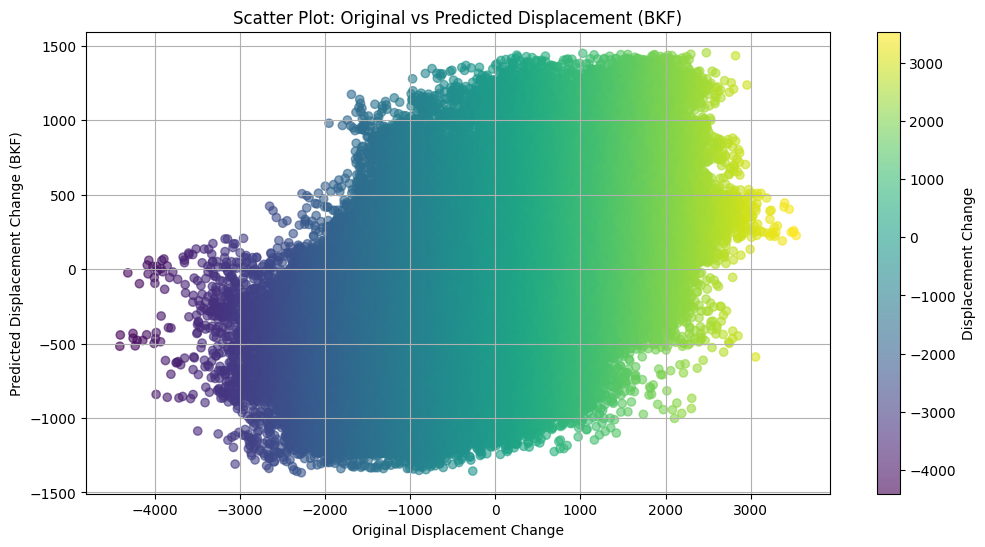

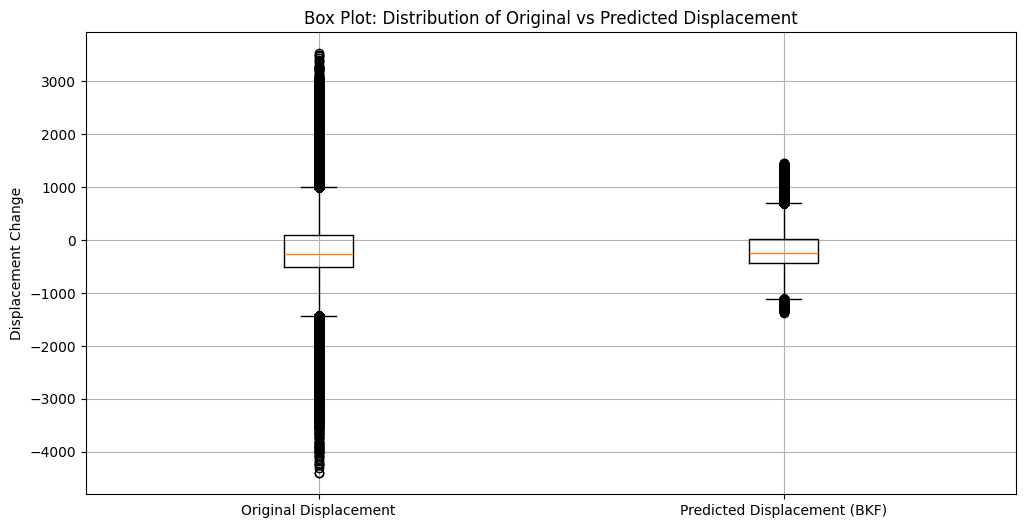

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a scatter plot with color variations based on the displacement_change
plt.figure(figsize=(12, 6))
scatter = plt.scatter(merged_df['displacement_change'], merged_df['predicted_displacement'],
                      c=merged_df['displacement_change'], cmap='viridis', alpha=0.6)
plt.title('Scatter Plot: Original vs Predicted Displacement (BKF)')
plt.xlabel('Original Displacement Change')
plt.ylabel('Predicted Displacement Change (BKF)')
plt.colorbar(scatter, label='Displacement Change')  # Add color bar to indicate the displacement magnitude
plt.grid(True)
plt.show()


# Box plot to compare original displacement and predicted displacement
plt.figure(figsize=(12, 6))
plt.boxplot([merged_df['displacement_change'], merged_df['predicted_displacement']],
            labels=['Original Displacement', 'Predicted Displacement (BKF)'])
plt.title('Box Plot: Distribution of Original vs Predicted Displacement')
plt.ylabel('Displacement Change')
plt.grid(True)
plt.show()
